<a href="https://colab.research.google.com/github/AkalaponCh/Predictive_Maintenance_Dataset_Classification/blob/main/Predictive_Maintenance_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Loading The Dataset**



In [5]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# **Preprocessing The Dataset**

First we focuses on understanding the structure and characteristics of the dataset that we just loaded. By examining various aspects of the data, we can identify potential issues and gain insights before proceeding with further analysis or model building.

In [6]:
print("Data Information:")
print(df.info())

print("\nDuplicated Values:")
print(df.duplicated().sum())

print("\nNumber of Unique Values:")
print(df.nunique())

print("\nData Statistical Summary:")
df.describe().T

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: fl

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [12]:
#Rename the columns to be in the same structure
df.rename(columns={'Type': 'Machine_Type', 'Air temperature [K]': 'Air_temperature_K', 'Process temperature [K]': 'Process_temperature_K',
                   'Rotational speed [rpm]': 'Rotational_speed_rpm', 'Torque [Nm]': 'Torque_Nm', 'Tool wear [min]': 'Tool_wear_min', 'Machine failure': 'Machine_failure'}, inplace=True)

**Drop Unnecessary Columns**


In [13]:
# Focus only on whater the machine fail or not
cols_to_drop = ['UDI','Product ID','TWF','HDF','PWF','OSF','RNF']
df.drop(columns=cols_to_drop, inplace=True)

df.head()

,Machine_Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


# **Feature Engineering**

Creating new features from the existing data to potentially improve the performance of machine learning models.

In [14]:
#Introduce more features
df['Temperature_differential'] = (df['Process_temperature_K']-df['Air_temperature_K'])
df['Power_W'] = np.round((df['Torque_Nm']*df['Rotational_speed_rpm']* 2 * np.pi) / 60,4)

df.head()

,Machine_Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,Temperature_differential,Power_W
0,M,298.1,308.6,1551,42.8,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,10.5,5897.8166


# **Exploratory Data Analysis**

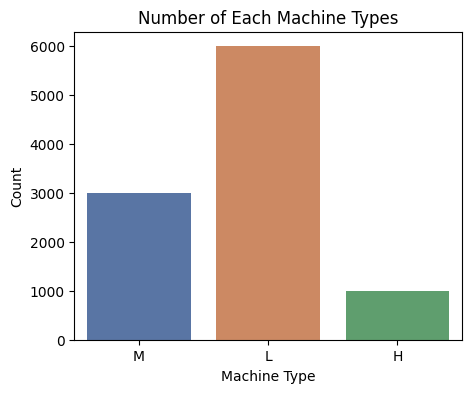

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='Machine_Type', data=df, hue='Machine_Type', palette='deep')
plt.title('Number of Each Machine Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()

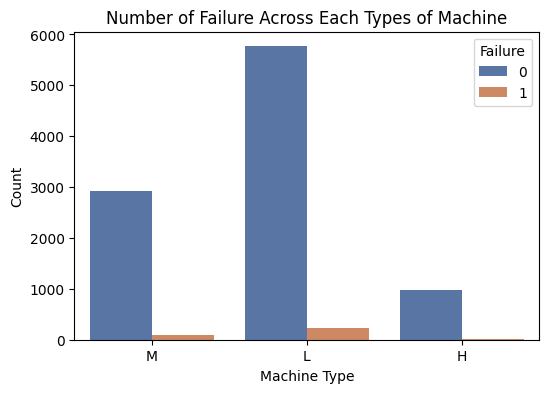

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Machine_Type', data=df, hue='Machine_failure', palette='deep')
plt.title('Number of Failure Across Each Types of Machine')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.legend(title='Failure')
plt.show()

In [11]:
sns.pairplot(df[['Torque_Nm', 'Rotational_speed_rpm', 'Tool_wear_min', 'Temperature_differential','Power_W', 'Machine_failure']], hue='Machine_failure', palette='deep')
plt.show()

KeyError: "None of [Index(['Torque_Nm', 'Rotational_speed_rpm', 'Tool_wear_min',\n       'Temperature_differential', 'Power_W', 'Machine_failure'],\n      dtype='object')] are in the [columns]"

We can see grouping of Machine that fail suggesting pattern of feature that lead to failure in machine

# **Input Split**

In [ ]:
#Turning catagorial feature into numerical form
df_encoded = pd.get_dummies(df, columns=['Machine_Type'])

X = df_encoded.drop(columns=['Failure_status'], axis=1)
y = df_encoded['Failure_status']

# **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaler = sc.fit_transform(X)

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=42, stratify=y)

**Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.57      0.18      0.27        68

    accuracy                           0.97      2000
   macro avg       0.77      0.59      0.63      2000
weighted avg       0.96      0.97      0.96      2000



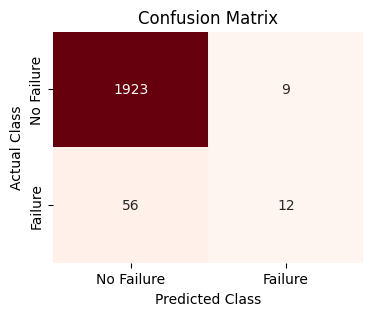

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**XGB Classifier Model**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.93      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000



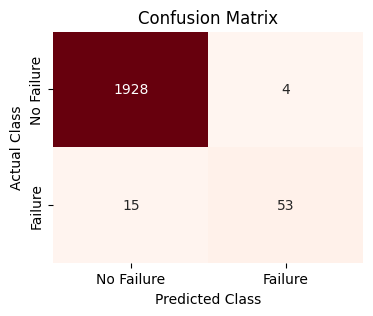

In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_jobs=-1)
clf_xgb.fit(x_train, y_train)

y_pred = clf_xgb.predict(x_test)

print(classification_report(y_test, y_pred))

failure_types = ['No Failure', 'Failure']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Random Forest Classifier Model**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.95      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.97      0.89      0.93      2000
weighted avg       0.99      0.99      0.99      2000



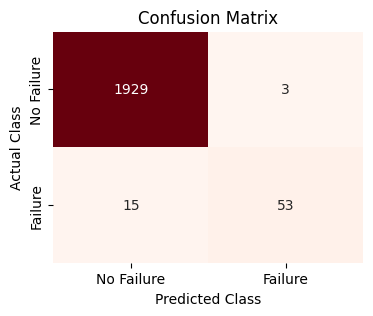

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_jobs=-1)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

print(classification_report(y_test, y_pred))

failure_types = ['No Failure', 'Failure']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# **Class Imbalancementt**

<Axes: xlabel='Failure_status', ylabel='count'>

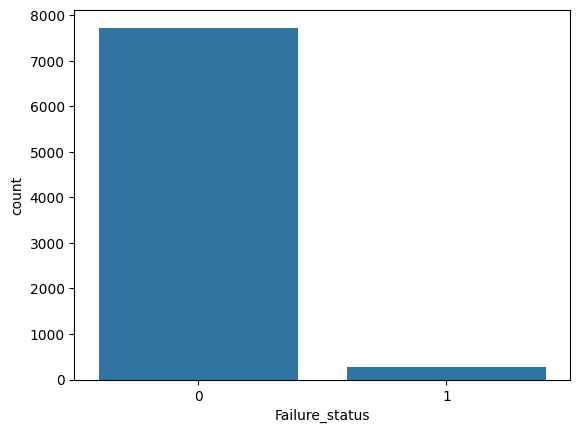

In [ ]:
sns.countplot(x=y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

#Using SMOTE to adress class imbalance
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

<Axes: xlabel='Failure_status', ylabel='count'>

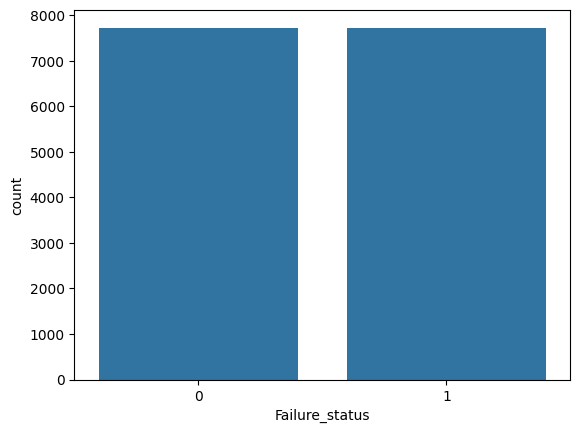

In [ ]:
sns.countplot(x=y_smote)

# **Model Training with SMOTE**

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1932
           1       0.18      0.87      0.30        68

    accuracy                           0.86      2000
   macro avg       0.59      0.87      0.61      2000
weighted avg       0.97      0.86      0.90      2000



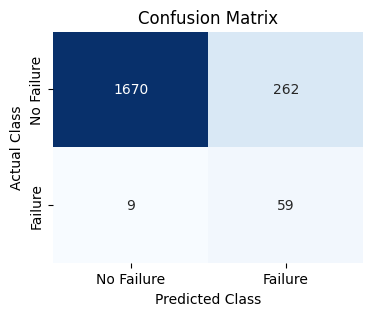

In [ ]:
LR = LogisticRegression()

LR.fit(x_smote, y_smote)
y_pred = LR.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.64      0.82      0.72        68

    accuracy                           0.98      2000
   macro avg       0.82      0.90      0.85      2000
weighted avg       0.98      0.98      0.98      2000



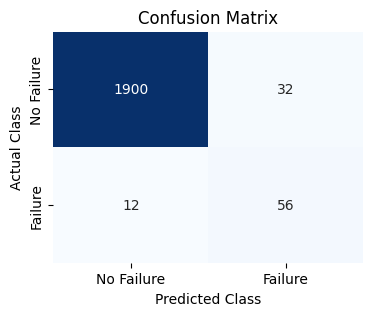

In [ ]:
clf_xgb = XGBClassifier(n_jobs=-1)

clf_xgb.fit(x_smote, y_smote)
y_pred = clf_xgb.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.56      0.82      0.67        68

    accuracy                           0.97      2000
   macro avg       0.78      0.90      0.83      2000
weighted avg       0.98      0.97      0.97      2000



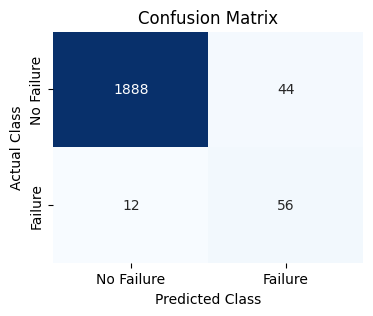

In [ ]:
RF = RandomForestClassifier(n_jobs=-1)

RF.fit(x_smote, y_smote)
y_pred = RF.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

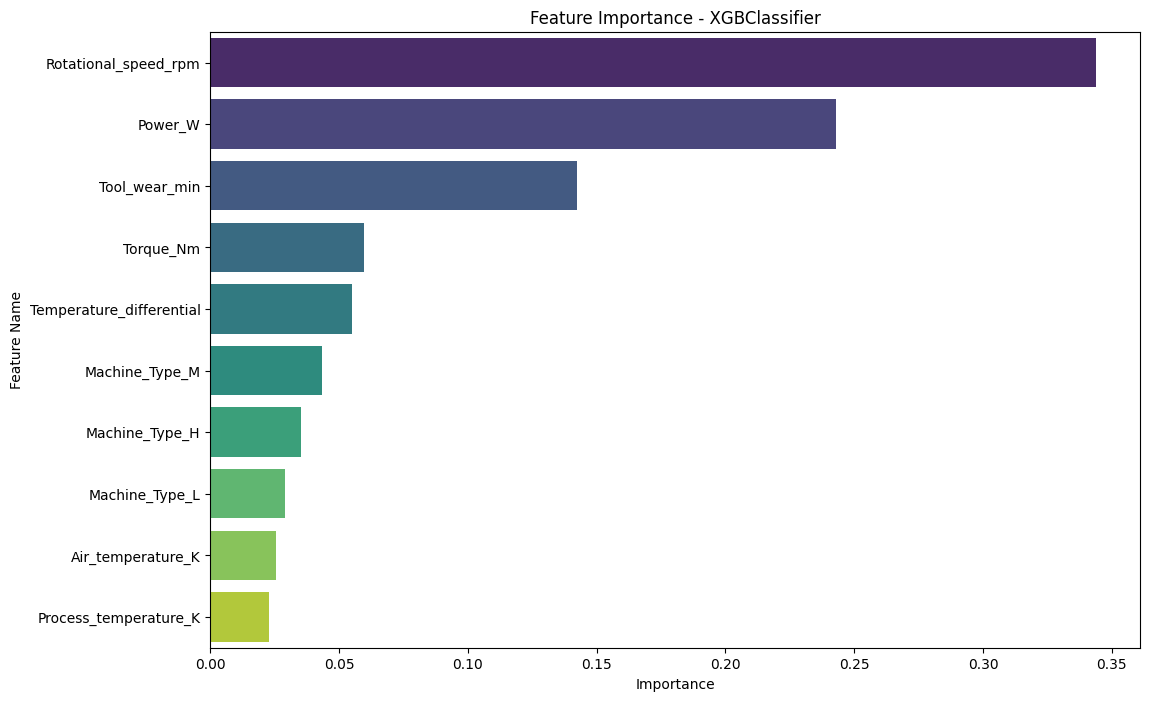

In [ ]:
#With XGBClassifier giving the best result, plot to see feature importance
feature_importances = clf_xgb.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

**Reference**

*   https://www.kaggle.com/code/jeevikasharma2003/ml-powered-maintenance-smarter-proactive

**Dataset Download link**

*   https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020



